# Data Oriented Programming Paradigms - Exercise 3
<h3> Preprocessing "cwurData.csv" </h3>

In [19]:
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn import preprocessing
from fancyimpute import KNN

Using TensorFlow backend.


In [3]:
# Read CSV file-
cwur_data = pd.read_csv("cwurData.csv")

In [4]:
# Get shape/dimension of data-
cwur_data.shape

(2200, 14)

In [5]:
# Get information about dataset-
cwur_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
world_rank              2200 non-null int64
institution             2200 non-null object
country                 2200 non-null object
national_rank           2200 non-null int64
quality_of_education    2200 non-null int64
alumni_employment       2200 non-null int64
quality_of_faculty      2200 non-null int64
publications            2200 non-null int64
influence               2200 non-null int64
citations               2200 non-null int64
broad_impact            2000 non-null float64
patents                 2200 non-null int64
score                   2200 non-null float64
year                    2200 non-null int64
dtypes: float64(2), int64(10), object(2)
memory usage: 240.7+ KB


In [6]:
# Check for missing value(s)-
cwur_data.isnull().values.any()

True

In [7]:
# Get column/attribute names containing NAs-
cwur_data.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [8]:
# Get number of unique values for 'institution' column-
len(cwur_data['institution'].unique().tolist())

1024

In [9]:
# Get number of unique values for 'country' column-
len(cwur_data['country'].unique().tolist())

59

In [10]:
# Do label encoding for the 2 columns. Transform Categories into Integers-
labelencoder = preprocessing.LabelEncoder()
labelencoder2 = preprocessing.LabelEncoder()

labelencoder.fit(cwur_data['institution'])
labelencoder2.fit(cwur_data['country'])

LabelEncoder()

In [11]:
# Transform categories into integers- apply fitted encoder to pandas column-
encoded_institution = labelencoder.transform(cwur_data['institution'])
encoded_country = labelencoder2.transform(cwur_data['country'])

In [12]:
# Add new columns to DataFrame-
cwur_data['encoded_institution'] = encoded_institution
cwur_data['encoded_country'] = encoded_country

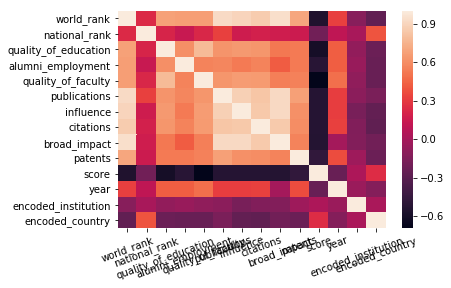

In [13]:
# Visualizations:

# Columns to use for visualization-
cols_to_use = []
cols_to_use = cwur_data.columns.tolist()

# Remove the following 2 columns from list-                            
cols_to_use.remove('country')
cols_to_use.remove('institution')

# Compute correlation for columns in 'cols_to_use'-
corr_mat = cwur_data.loc[:, cols_to_use].corr()

# Create a correlation graph-
sns.heatmap(corr_mat)
plt.xticks(rotation = 20)

plt.rcParams['figure.figsize'] = [25, 10]  # creates a figure with 25 (width) x 10 (height) inches

plt.show()

# We can use the correlation graph for further exploratory analysis!

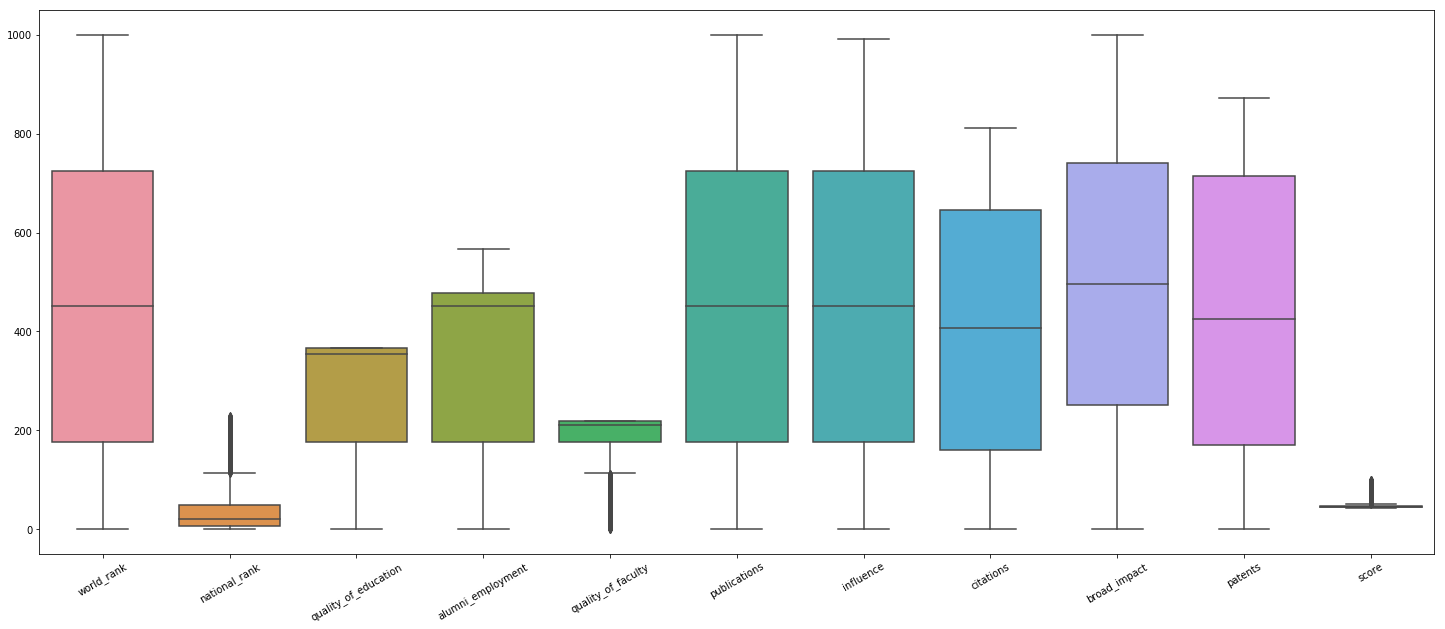

In [14]:
# Boxplots-

# Create a list variable to store all attribute/column names for which
# boxplots have to be drawn-
cols_boxplot = cols_to_use.copy()

# Remove the following columns/attributes-
cols_boxplot.remove('year')
cols_boxplot.remove('encoded_country')
cols_boxplot.remove('encoded_institution')



# This will make boxplots for each numeric column of your dataframe-
# sns.boxplot(data = cwur_data)
sns.boxplot(data = cwur_data.loc[:, cols_boxplot])

# Rotate text on x-axis by 30 degrees-
plt.xticks(rotation = 30)

plt.show()

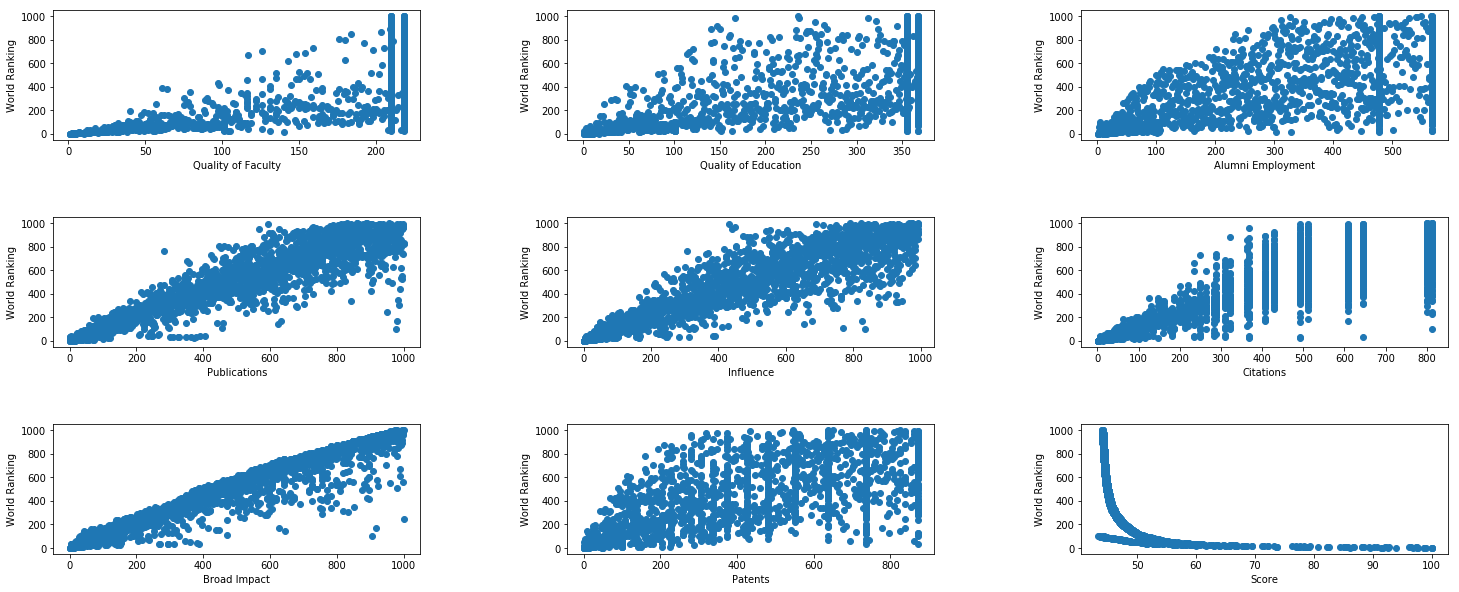

In [15]:
# Draw multiple plots together-
# Scatter plot of different attributes with 'world_rank' attribute to see correlation


fig, ax = plt.subplots(3, 3)

# Adjust spacing between plots-
fig.subplots_adjust(hspace = 0.6, wspace = 0.4)

ax[0, 0].scatter(cwur_data["quality_of_faculty"], cwur_data["world_rank"])
ax[0, 0].set_xlabel("Quality of Faculty")
ax[0, 0].set_ylabel("World Ranking")

ax[0, 1].scatter(cwur_data["quality_of_education"], cwur_data["world_rank"])
ax[0, 1].set_xlabel("Quality of Education")
ax[0, 1].set_ylabel("World Ranking")

ax[0, 2].scatter(cwur_data["alumni_employment"], cwur_data["world_rank"])
ax[0, 2].set_xlabel("Alumni Employment")
ax[0, 2].set_ylabel("World Ranking")

ax[1, 0].scatter(cwur_data["publications"], cwur_data["world_rank"])
ax[1, 0].set_xlabel("Publications")
ax[1, 0].set_ylabel("World Ranking")

ax[1, 1].scatter(cwur_data["influence"], cwur_data["world_rank"])
ax[1, 1].set_xlabel("Influence")
ax[1, 1].set_ylabel("World Ranking")

ax[1, 2].scatter(cwur_data["citations"], cwur_data["world_rank"])
ax[1, 2].set_xlabel("Citations")
ax[1, 2].set_ylabel("World Ranking")

ax[2, 0].scatter(cwur_data["broad_impact"], cwur_data["world_rank"])
ax[2, 0].set_xlabel("Broad Impact")
ax[2, 0].set_ylabel("World Ranking")

ax[2, 1].scatter(cwur_data["patents"], cwur_data["world_rank"])
ax[2, 1].set_xlabel("Patents")
ax[2, 1].set_ylabel("World Ranking")

ax[2, 2].scatter(cwur_data["score"], cwur_data["world_rank"])
ax[2, 2].set_xlabel("Score")
ax[2, 2].set_ylabel("World Ranking")

plt.show()


# Preprocessing "shanghaiData.csv"

In [21]:
# Change directory to data directory-
os.chdir("./Kaggle-Dataset/")

In [22]:
# Read CSV file-
shanghai_data = pd.read_csv("shanghaiData.csv")

In [23]:
# Get dimension/shape of dataset-
shanghai_data.shape

(4897, 11)

In [24]:
# Get information about dataset-
shanghai_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4897 entries, 0 to 4896
Data columns (total 11 columns):
world_rank         4897 non-null object
university_name    4896 non-null object
national_rank      4896 non-null object
total_score        1101 non-null float64
alumni             4896 non-null float64
award              4895 non-null float64
hici               4895 non-null float64
ns                 4875 non-null float64
pub                4895 non-null float64
pcp                4895 non-null float64
year               4897 non-null int64
dtypes: float64(7), int64(1), object(3)
memory usage: 420.9+ KB


In [26]:
# Check for missing values in dataset-
shanghai_data.isnull().values.any()

True

In [27]:
# Check for missing values (Sum of them)-
shanghai_data.isnull().sum().sum()

3829

In [28]:
# Get names of attributes having missing values-
shanghai_data.isnull().sum()

world_rank            0
university_name       1
national_rank         1
total_score        3796
alumni                1
award                 2
hici                  2
ns                   22
pub                   2
pcp                   2
year                  0
dtype: int64

In [29]:
# Impute missing values using knn-

# Attributes for which missing values will be imputed using knn-
cols_to_use = ['total_score', 'alumni', 'award', 'hici', 'ns', 'pub', 'pcp']

In [30]:
# Use k = 3 nearest rows which have a feature to fill in for each row's missing features-
shanghai_data_filled_na = KNN(k=3).fit_transform(shanghai_data.loc[:, cols_to_use])

Imputing row 1/4897 with 0 missing, elapsed time: 3.888
Imputing row 101/4897 with 1 missing, elapsed time: 3.889
Imputing row 201/4897 with 1 missing, elapsed time: 3.894
Imputing row 301/4897 with 1 missing, elapsed time: 3.898
Imputing row 401/4897 with 1 missing, elapsed time: 3.901
Imputing row 501/4897 with 0 missing, elapsed time: 3.905
Imputing row 601/4897 with 0 missing, elapsed time: 3.905
Imputing row 701/4897 with 1 missing, elapsed time: 3.910
Imputing row 801/4897 with 1 missing, elapsed time: 3.914
Imputing row 901/4897 with 1 missing, elapsed time: 3.917
Imputing row 1001/4897 with 0 missing, elapsed time: 3.921
Imputing row 1101/4897 with 0 missing, elapsed time: 3.921
Imputing row 1201/4897 with 1 missing, elapsed time: 3.926
Imputing row 1301/4897 with 1 missing, elapsed time: 3.930
Imputing row 1401/4897 with 1 missing, elapsed time: 3.933
Imputing row 1501/4897 with 1 missing, elapsed time: 3.937
Imputing row 1601/4897 with 0 missing, elapsed time: 3.938
Imputing 

In [31]:
# Dimension of missing values imputed dataset-
shanghai_data_filled_na.shape

(4897, 7)

In [32]:
# Convert 'shanghai_data_filled_na' from numpy to pandas DataFrame-
shanghai_data_filled_na = pd.DataFrame(shanghai_data_filled_na, columns = cols_to_use)

In [33]:
# Add the 4 attributes to 'shanghai_data_filled_na' from 'shanghai_data'-
shanghai_data_filled_na['world_rank'] = shanghai_data['world_rank']
shanghai_data_filled_na['university_name'] = shanghai_data['university_name']
shanghai_data_filled_na['national_rank'] = shanghai_data['national_rank']
shanghai_data_filled_na['year'] = shanghai_data['year']

In [34]:
# Dimension after adding 4 attributes-
shanghai_data_filled_na.shape

(4897, 11)

In [35]:
# Check for missing values-
shanghai_data_filled_na.isnull().values.any()

True

In [36]:
shanghai_data_filled_na.isnull().sum()

total_score        0
alumni             0
award              0
hici               0
ns                 0
pub                0
pcp                0
world_rank         0
university_name    1
national_rank      1
year               0
dtype: int64

In [37]:
# To find out which rows have NaNs for 'university_name' attribute-
nan_uni_name = shanghai_data_filled_na[shanghai_data_filled_na['university_name'].isnull()]
print("\nRows having NaNs for 'university_name' are:\n{0}\n\n".format(list(nan_uni_name.index)))


Rows having NaNs for 'university_name' are:
[3896]




In [38]:
# To find out which rows have NaNs for 'national_rank' attribute-
nan_nat_rank = shanghai_data_filled_na[shanghai_data_filled_na['national_rank'].isnull()]
print("\nRows having NaNs for 'national_rank' are:\n{0}\n\n".format(list(nan_nat_rank.index)))


Rows having NaNs for 'national_rank' are:
[3896]




In [39]:
# Put 'NA' as value for row number 3896-
shanghai_data_filled_na.loc[3896, 'national_rank'] = "NA"
shanghai_data_filled_na.loc[3896, 'university_name'] = "NA"

In [40]:
# Check for missing data in 'shanghai_data_filled_na' for sanity check-
shanghai_data_filled_na.isnull().values.any()

False

In [41]:
# Get number of unique values for 'university_name' column-
len(shanghai_data_filled_na['university_name'].unique().tolist())

659

In [42]:
# Get number of unique values for 'world_rank' column-
len(shanghai_data_filled_na['world_rank'].unique().tolist())

119

In [43]:
# Get number of unique values for 'national_rank' column-
len(shanghai_data_filled_na['national_rank'].unique().tolist())

293

In [44]:
# Do label encoding for the 3 columns/attributes viz., world_rank, national_rank & university_name
# Transform Categories into Integers-
le = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
le3 = preprocessing.LabelEncoder()

In [45]:
le.fit(shanghai_data_filled_na['world_rank'])
le2.fit(shanghai_data_filled_na['university_name'])
le3.fit(shanghai_data_filled_na['national_rank'])

LabelEncoder()

In [46]:
# Transform categories into integers- apply fitted encoder to pandas column-
encoded_world_rank = le.transform(shanghai_data_filled_na['world_rank'])
encoded_university_name = le2.transform(shanghai_data_filled_na['university_name'])
encoded_national_rank = le3.transform(shanghai_data_filled_na['national_rank'])

In [47]:
# Add new columns/attributes to DataFrame-
shanghai_data_filled_na['encoded_world_rank'] = encoded_world_rank
shanghai_data_filled_na['encoded_university_name'] = encoded_university_name
shanghai_data_filled_na['encoded_national_rank'] = encoded_national_rank

In [48]:
# Visualizations:

# Columns to use for visualization-
cols_for_visualization = []
cols_for_visualization = shanghai_data_filled_na.columns.tolist()

# Remove the following 3 columns from list-
cols_for_visualization.remove('world_rank')
cols_for_visualization.remove('university_name')
cols_for_visualization.remove('national_rank')

In [49]:
# Compute correlation for columns in 'cols_for_visualization'-
corr_mat = shanghai_data_filled_na.loc[:, cols_for_visualization].corr()

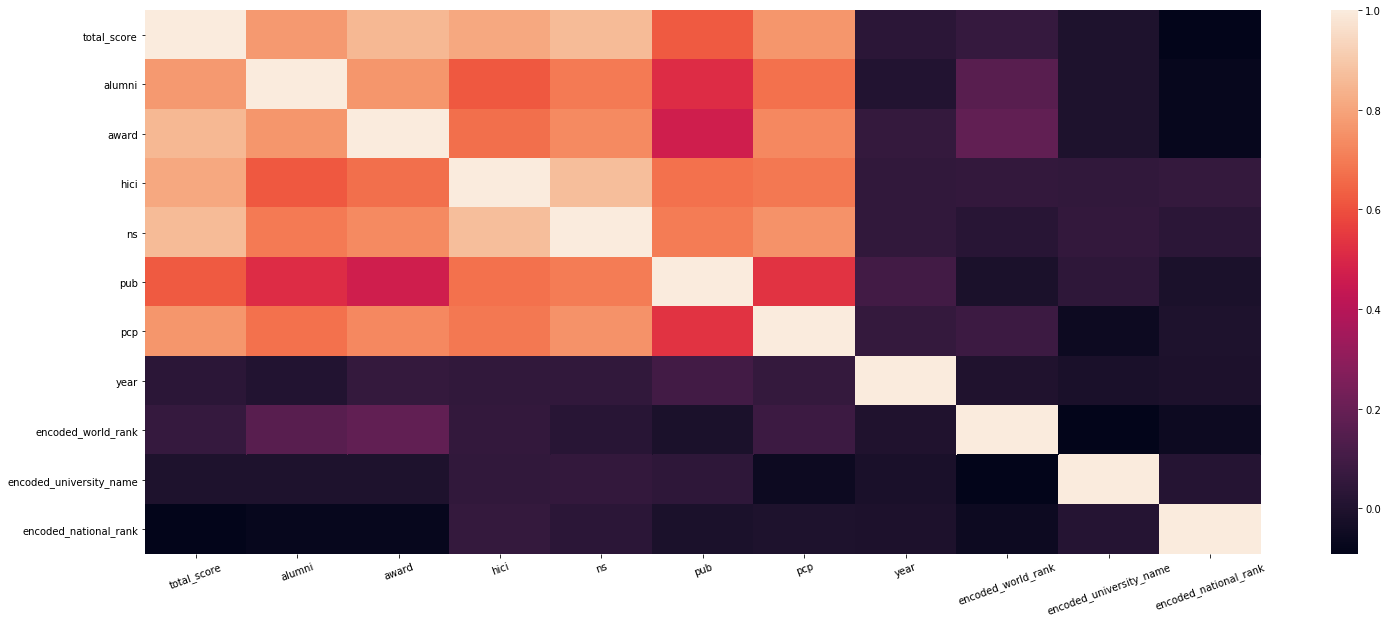

In [51]:
# Create a correlation graph-
sns.heatmap(corr_mat)
plt.xticks(rotation = 20)

plt.rcParams['figure.figsize'] = [25, 10]  # creates a figure with 25 (width) x 10 (height) inches

plt.show()

In [56]:
# Boxplots-

# Create a list variable to store all attribute/column names for which
# boxplots have to be drawn-
cols_boxplot = cols_for_visualization.copy()

In [58]:
# Remove the following columns/attributes-
cols_boxplot.remove("year")
cols_boxplot.remove("encoded_university_name")

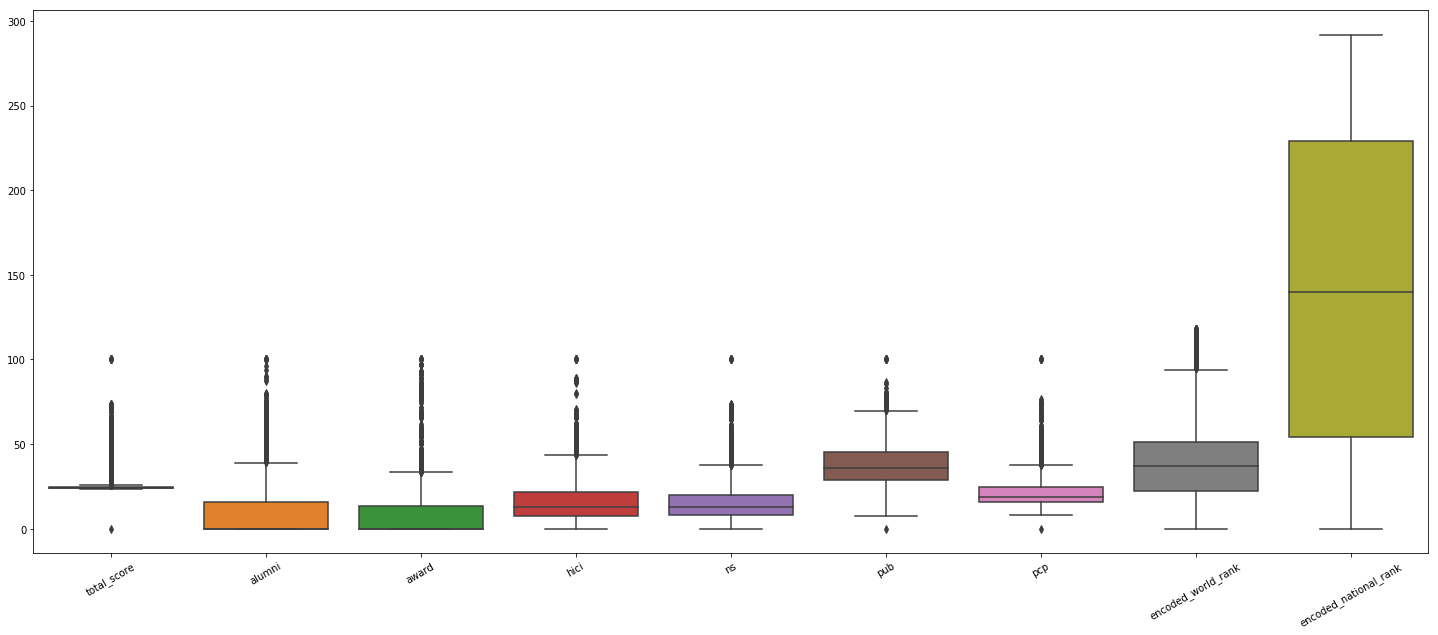

In [59]:
# This will make boxplots for each numeric column of your dataframe-
# sns.boxplot(data = cwur_data)
sns.boxplot(data = shanghai_data_filled_na.loc[:, cols_boxplot])

# Rotate text on x-axis by 30 degrees-
plt.xticks(rotation = 30)

plt.show()

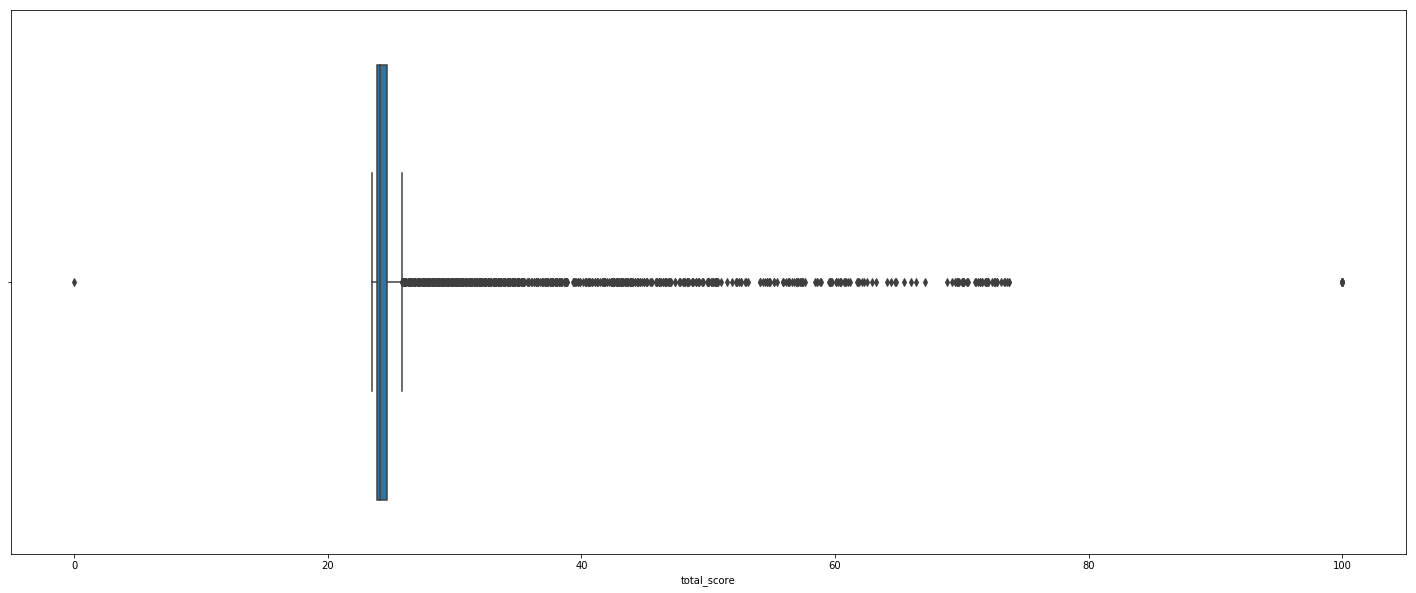

In [60]:
# Draw boxplot on x-axis to visualize any outliers for

# Boxplot for 'total_score' attribute-
sns.boxplot(shanghai_data_filled_na['total_score'])

plt.show()

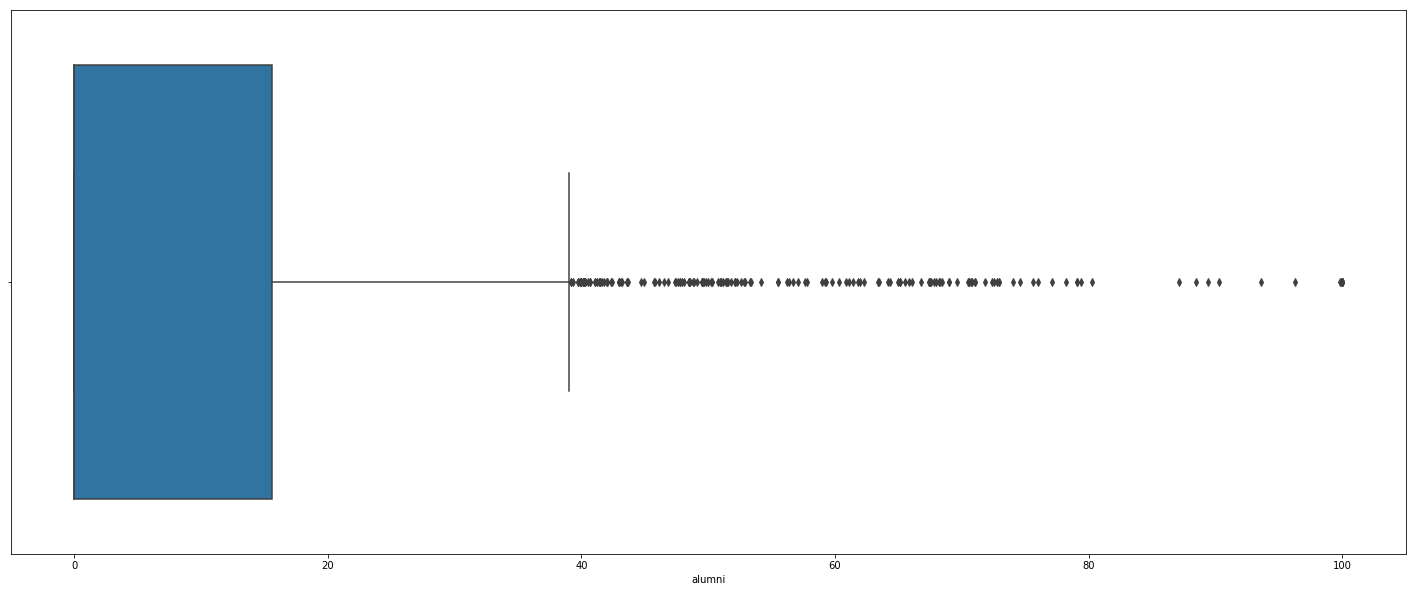

In [61]:
# Boxplot for 'alumni' attribute-
sns.boxplot(shanghai_data_filled_na['alumni'])

plt.show()

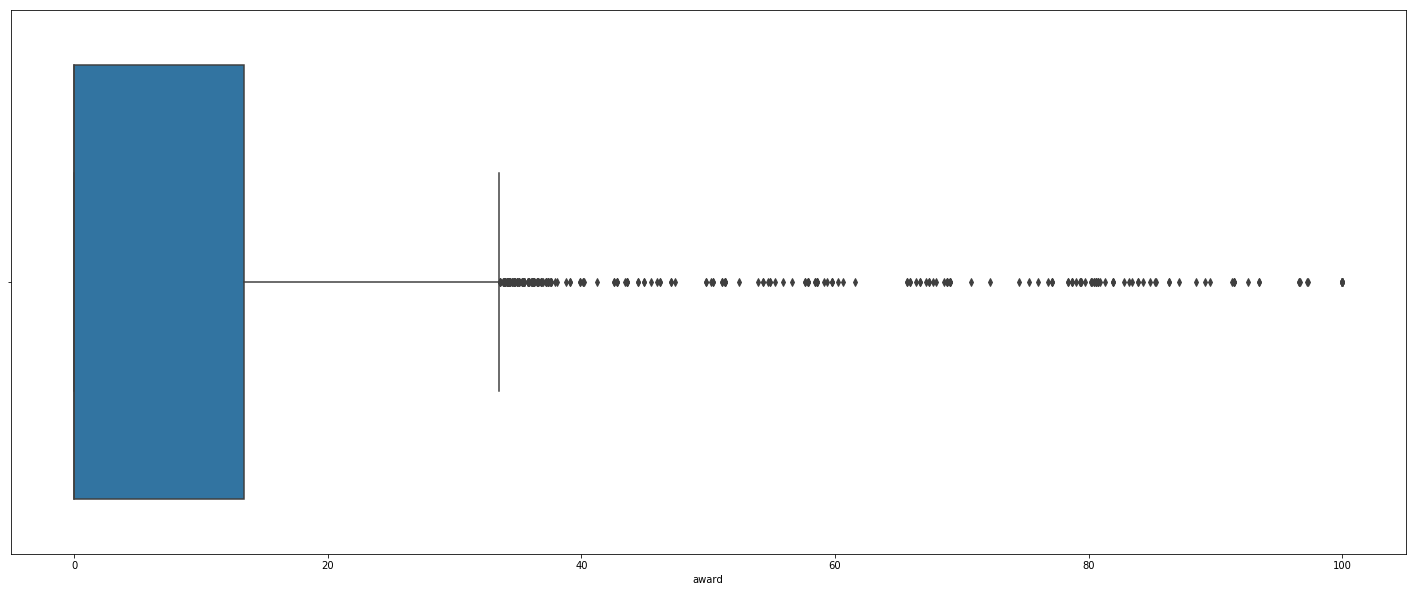

In [62]:
# Boxplot for 'award' attribute-
sns.boxplot(shanghai_data_filled_na['award'])

plt.show()

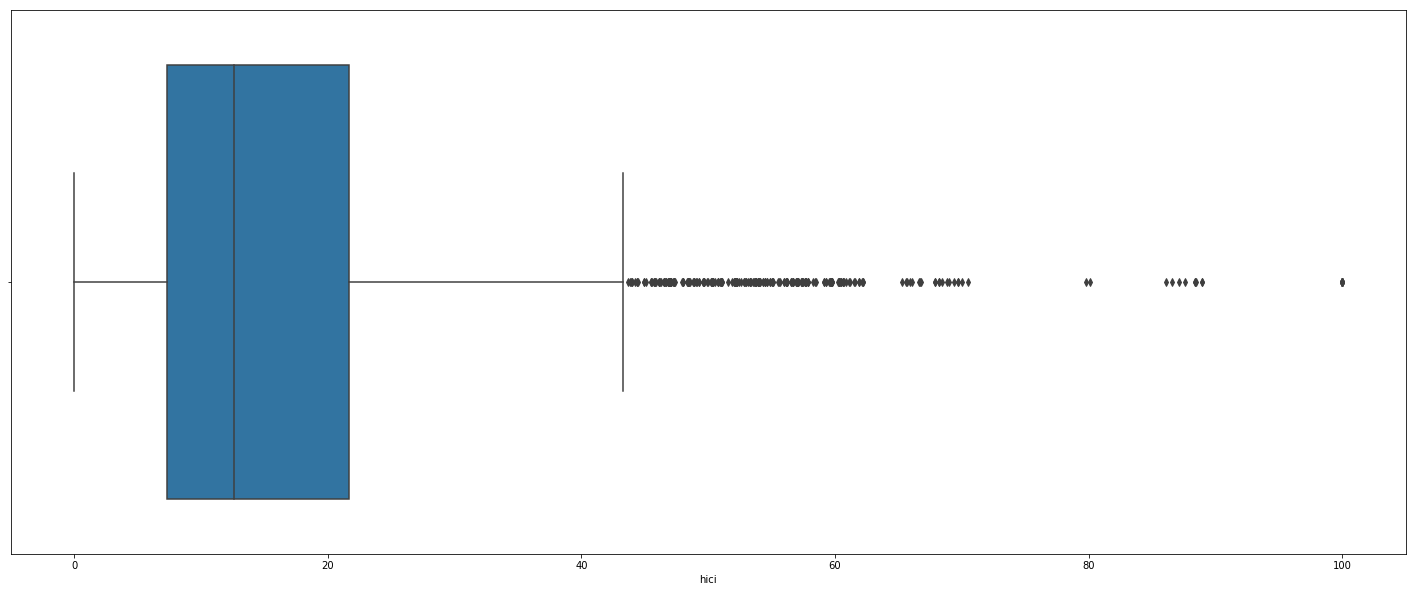

In [63]:
# Boxplot for 'hici' attribute-
sns.boxplot(shanghai_data_filled_na['hici'])

plt.show()

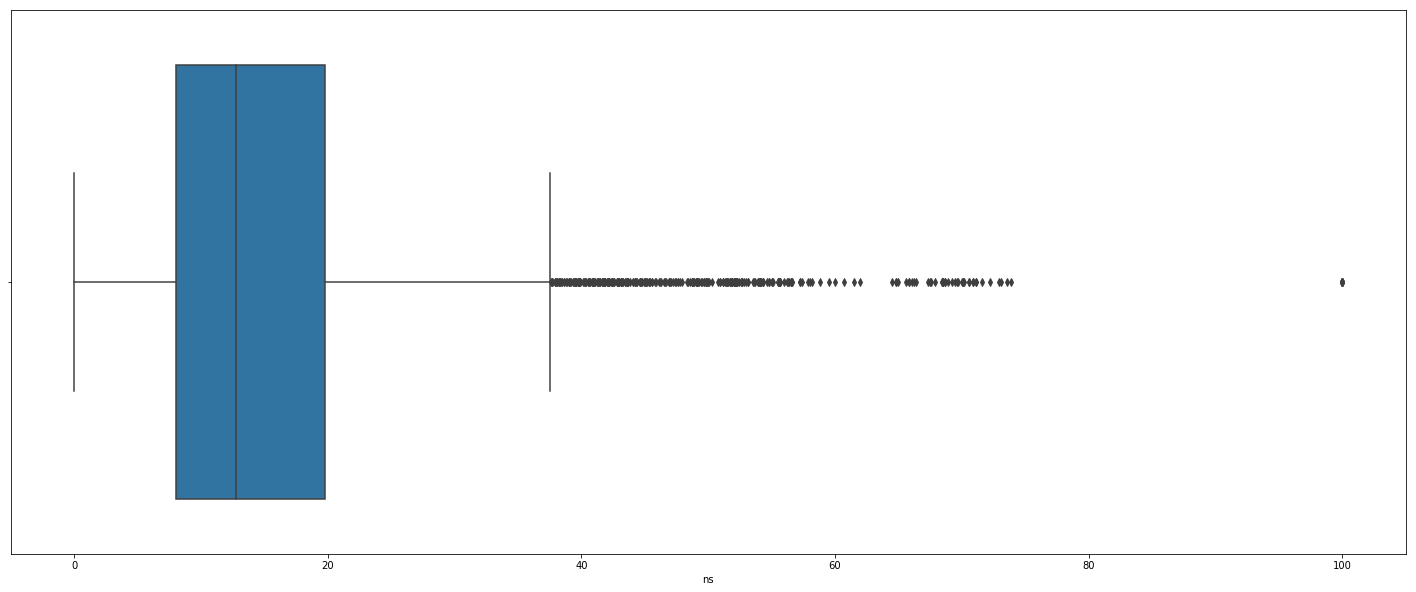

In [64]:
# Boxplot for 'ns' attribute-
sns.boxplot(shanghai_data_filled_na['ns'])

plt.show()

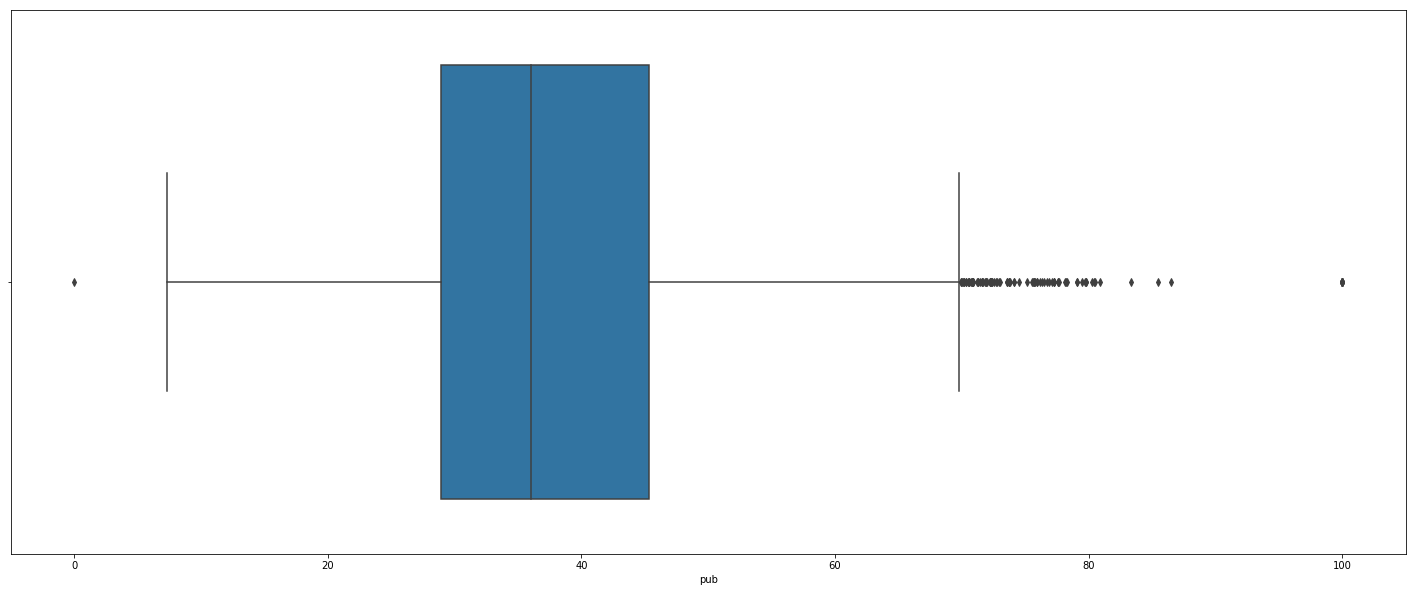

In [65]:
# Boxplot for 'pub' attribute-
sns.boxplot(shanghai_data_filled_na['pub'])

plt.show()

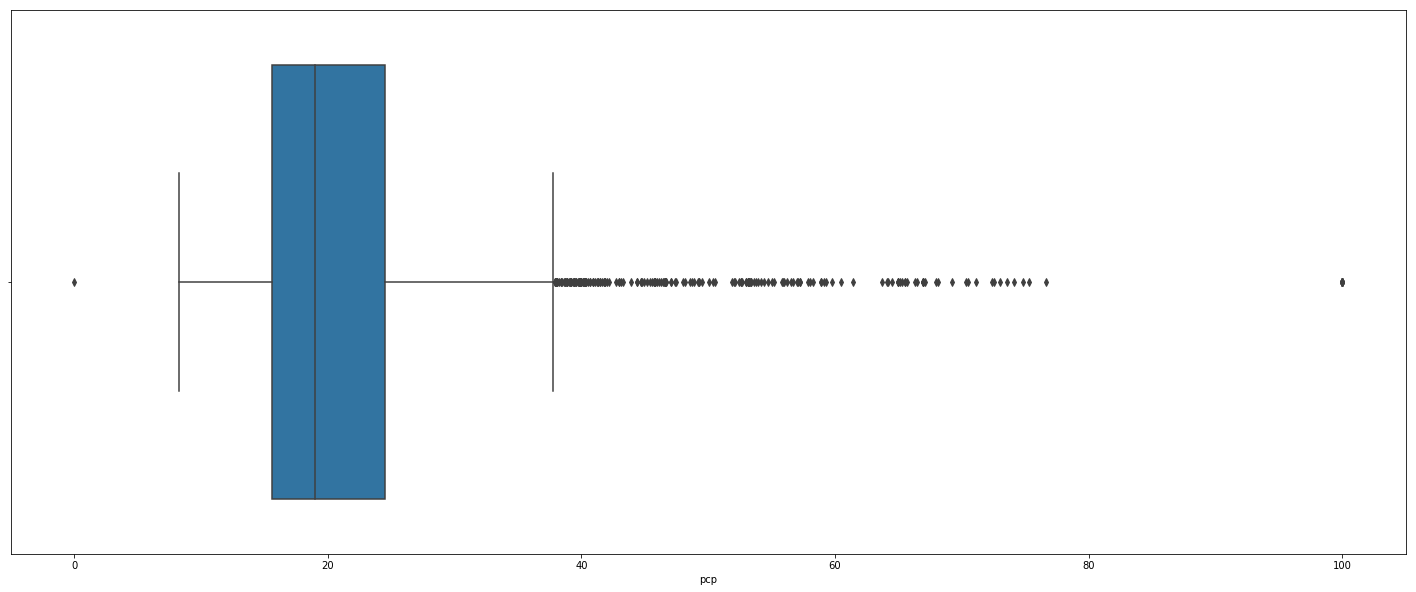

In [66]:
# Boxplot for 'pcp' attribute-
sns.boxplot(shanghai_data_filled_na['pcp'])

plt.show()

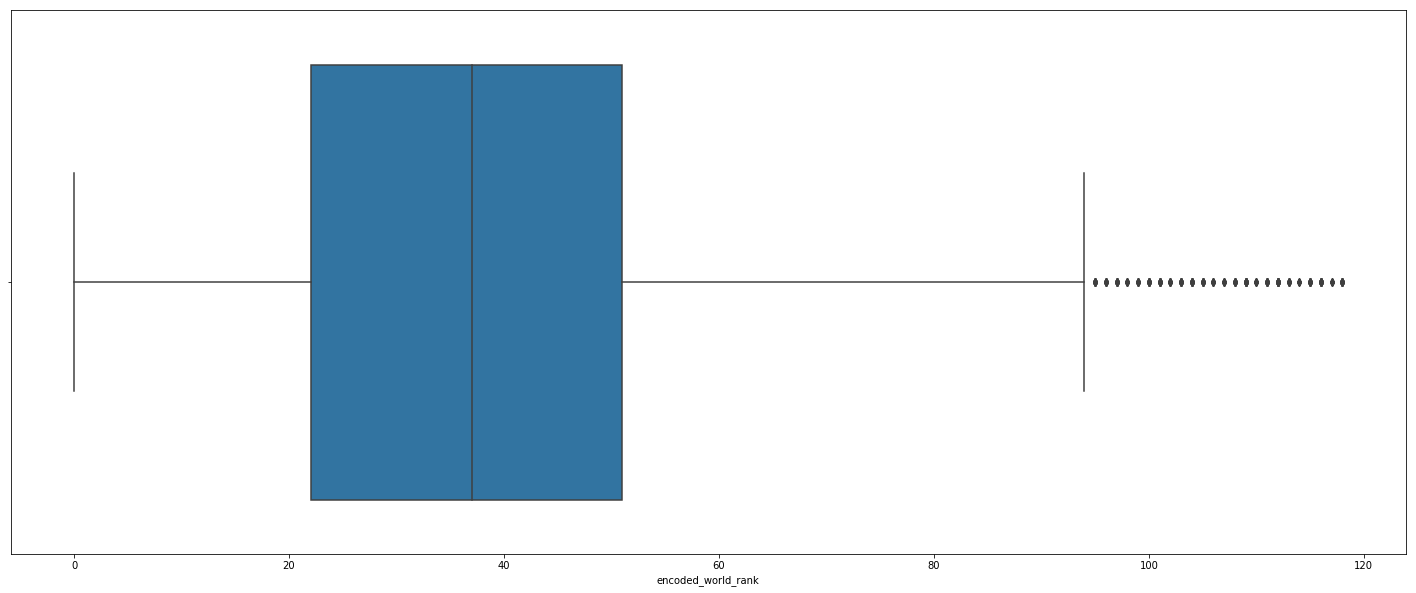

In [67]:
# Boxplot for 'encoded_world_rank' attribute-
sns.boxplot(shanghai_data_filled_na['encoded_world_rank'])

plt.show()